(25000, 23)
(25000, 22)
<bound method NDFrame.head of               AP     creation_date_answer  situation  ctc  location  gc_id  \
id                                                                           
cb7a4e0dd0777  f  2019-03-13 07:00:52.562         30  NaN       100     40   
e78e3915f3e30  f  2019-01-07 13:45:55.741         -1    f        95     40   
8e65ba155f983  f  2019-01-25 14:01:07.041         -1    f        34     20   
701e90ca03ce2  f  2019-01-16 14:35:11.432         10    f        45     40   
768fefec8609a  f  2019-02-11 14:25:37.331         10    f        95    100   
...           ..                      ...        ...  ...       ...    ...   
3232bad9c00cc  f  2019-02-11 09:06:49.715         -1    f        60     10   
7b178c38ad263  f  2019-01-23 09:56:24.209         -1    f        45     10   
5876ad905d4b4  f  2019-03-10 07:23:42.048         -1  NaN        58     10   
5921ef2921c68  f  2019-02-27 16:28:57.107         -1  NaN        60     20   
d4152ad641

<ipython-input-70-bcfb46bd8c60>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))


AP                      -0.000345
creation_date_answer    -0.052975
situation                0.001983
location                -0.020473
gc_id                    0.041049
gc_label                 0.024398
creation_date_global    -0.095863
id_group                -0.001815
id_group_2               0.009110
favorite_fruit           0.041094
fruit_situation_id      -0.412233
fruit_situation_label    0.006572
number_of_fruit          0.037076
id_group_3              -0.025603
creation_date_request   -0.053014
hobby                   -0.005200
id_group_4               0.008818
green_vegetables         0.042520
target                   1.000000
Name: target, dtype: float64
                  0     1     2     3
id                                   
cb7a4e0dd0777  0.50  0.39  0.10  0.00
e78e3915f3e30  0.41  0.37  0.20  0.02
8e65ba155f983  0.39  0.41  0.20  0.00
701e90ca03ce2  0.73  0.13  0.12  0.02
768fefec8609a  0.38  0.39  0.21  0.02
...             ...   ...   ...   ...
3232bad9c00cc  0.56  

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


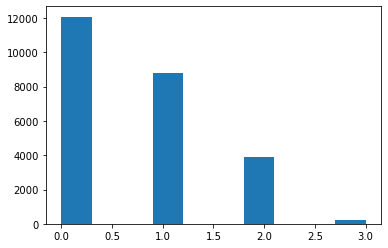

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.neural_network import MLPClassifier

#importation de nos deux databases 
train = pd.read_csv('train.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
print(train.shape)
print(test.shape)
print(test.head)
#visiualisation des valeurs manquantes pour chaque colonne pour les données train 
print(train.count())
#supressions des variables(colonne) qui contiennent -50 % des données total (-12500 Données)
train = train.dropna(thresh = 12500, axis=1)
testt = test.dropna(thresh = 12500, axis=1)
#imputation des valeurs manquantes. dans notre cas on parle de la colonne  'fruit_situation_label' qui na que 23272/25000 données 
train['fruit_situation_label']= train.fruit_situation_label.fillna(method = 'ffill')# j'ai propagé la dernière valeur valide vers le prochaine

print(train.count())# maintenant notre database est compléte 

# Histogramme le la repartition de toutes les valeurs cibles de la colonne target.
plt.hist(train.target)

#Etude de correlation avec la colonne target et les autres colonnes 
print(train.corr()['target'])# on remarque que certaines colonnes n'ont pas eté prise en compte 


# normalisation de nos données.
def norm(X):
    for column in X.columns.tolist():
        if X[column].dtype == type(object):
            le = LabelEncoder()
            X[column] = le.fit_transform(X[column].astype(str))
norm(train)
norm(testt)

# on refait une Etude de correlation avec la colonne target
print(train.corr()['target'])# maintenant on est sur qu'on a pris toutes les colones en consideration méme si on pourrais les trier et de garder que les plus pertinantes. 

# maintenant que notre data et clean et compléte on designe les X_train et les Y_train aussi les X_test
columnst = train.columns.tolist()
x_train = train[[c for c in columnst if c not in ['target']]]# on prend toutes nos colonnes pour prédire les valeur target 
y_train = train.target #notre objectif c'est des prédire les valeurs cible de target 
x_test = testt
#creation du classifieur 
clf= LogisticRegression(C=1000)
#clf = MLPClassifier(hidden_layer_sizes=(10,100,300), activation='logistic', solver='lbfgs', learning_rate='adaptive')


clf.fit(x_train,y_train)
y_pred = clf.predict_proba(x_test)


df= pd.DataFrame(y_pred, columns=lr.classes_)
df.set_index(test.index, inplace = True)
df = df.round(2)
print(df)
#df.to_csv("y_pred_NASSIM.csv")